In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


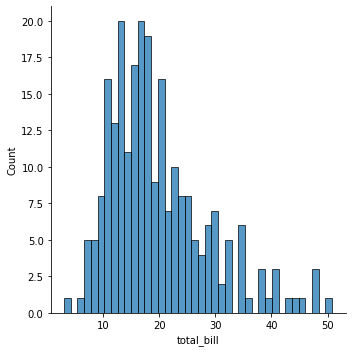

In [10]:
sns.displot(tips['total_bill'],kde=False,bins=40)

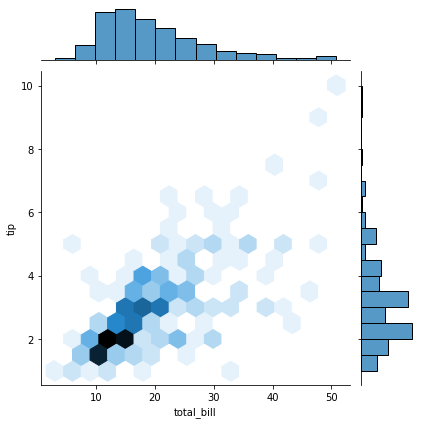

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

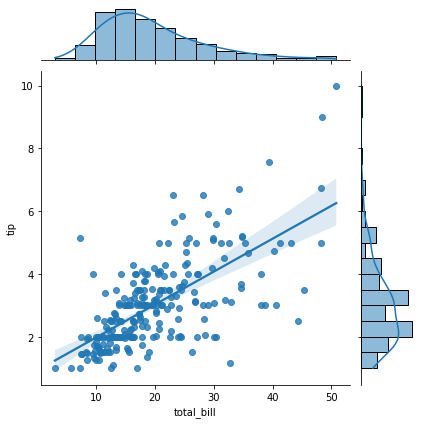

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

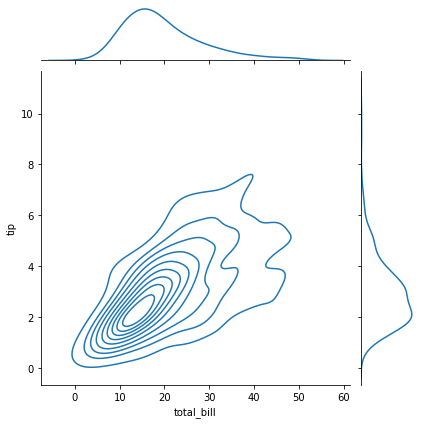

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

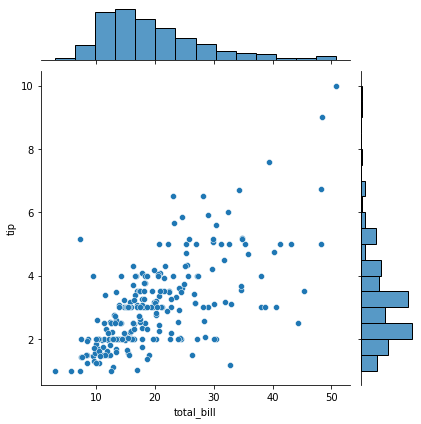

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips)

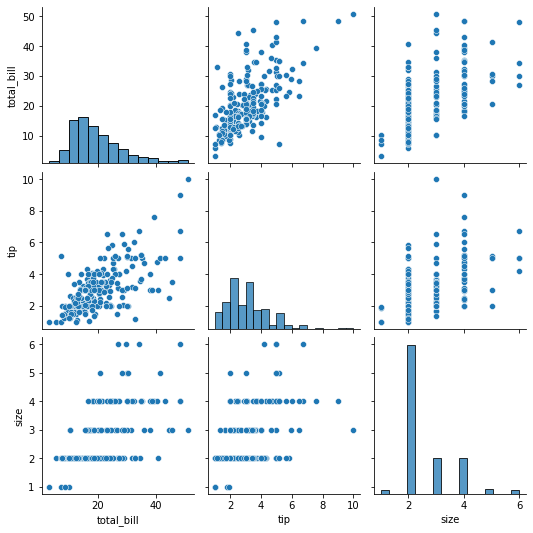

In [20]:
sns.pairplot(tips)

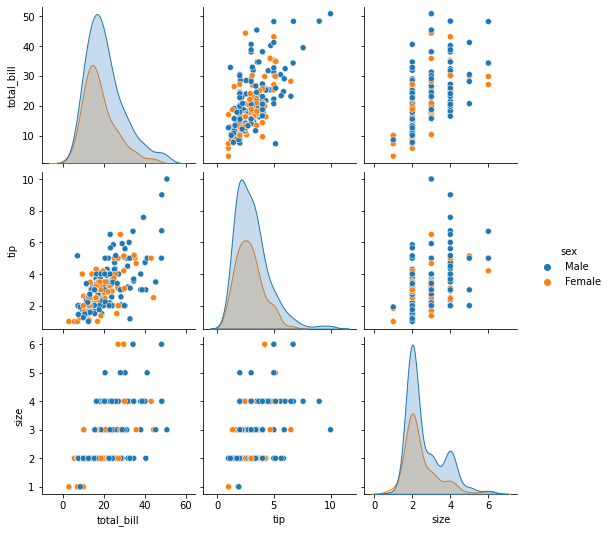

In [21]:
sns.pairplot(tips,hue='sex')

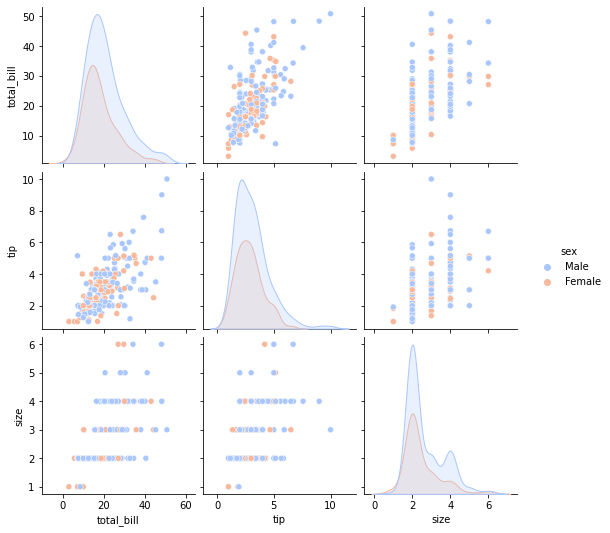

In [22]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

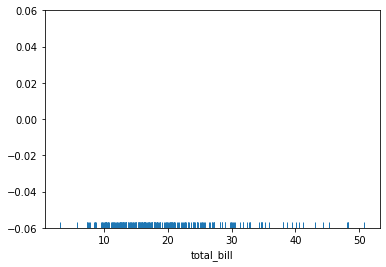

In [23]:
sns.rugplot(tips['total_bill'])

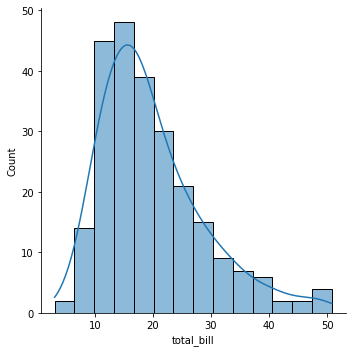

In [25]:
sns.displot(tips['total_bill'],kde=True)

In [26]:
#kernal density estimation

(0.0, 1.0)

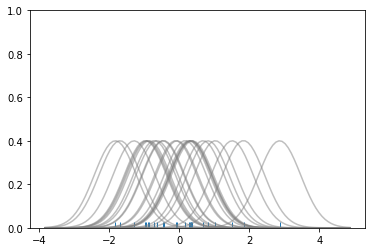

In [29]:
##

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#create a data set
dataset = np.random.randn(25)

#create a rugplot
sns.rugplot(dataset);

#setup the x axis for the plot
x_min = dataset.min() -2
x_max = dataset.max() +2


#100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

#set up the bandwidth for info on this
url = 'http://en.wikipedia.org/wiki/kernel_density_estimation#practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


#create and empty kernal list
kernel_list = []

#plot each basis function
for data_point in dataset:
    
    #create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for ploting 
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    

plt.ylim(0,1)


Text(0.5, 0.98, 'Sum of the Basis Functions')

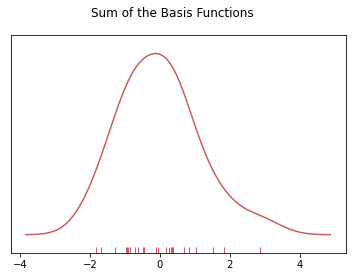

In [31]:
#to get the kde plot we can sum these basis functions

#plot the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

#plot figuree
fig = plt.plot(x_axis, sum_of_kde,color ='indianred')

#add the initial rugplot
sns.rugplot(dataset,c='indianred')

#get rid of y-tick marks

plt.yticks([])

#set title
plt.suptitle('Sum of the Basis Functions')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

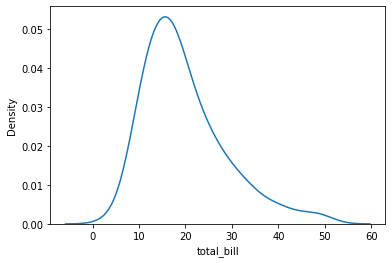

In [32]:
sns.kdeplot(tips['total_bill'])

## Categorical Plots

In [33]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

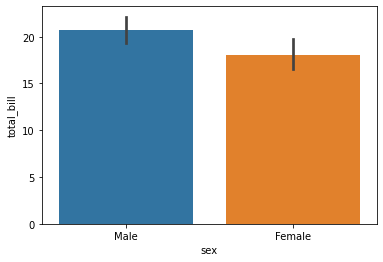

In [34]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [35]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

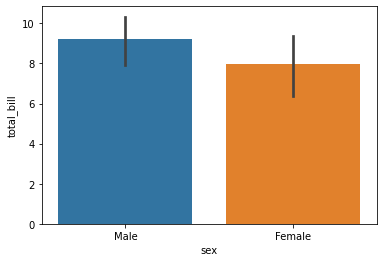

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

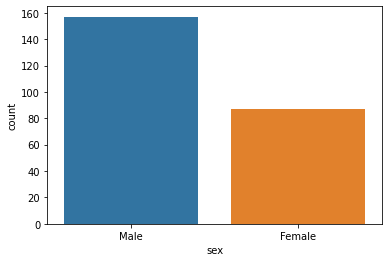

In [37]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

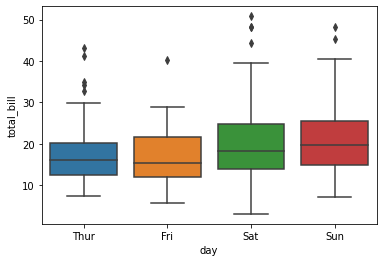

In [40]:
sns.boxplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

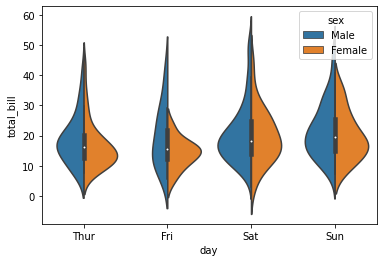

In [43]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

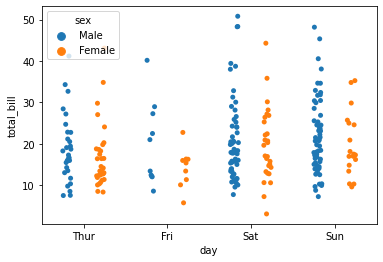

In [47]:
sns.stripplot(x='day',y='total_bill', data=tips,jitter=True,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

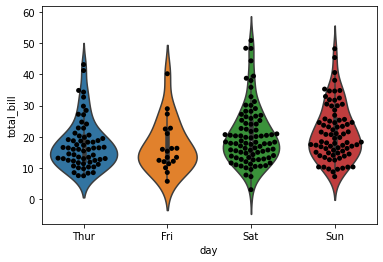

In [52]:

sns.violinplot(x='day', y='total_bill', data=tips)

sns.swarmplot(x='day', y='total_bill', data=tips,color='black')

C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


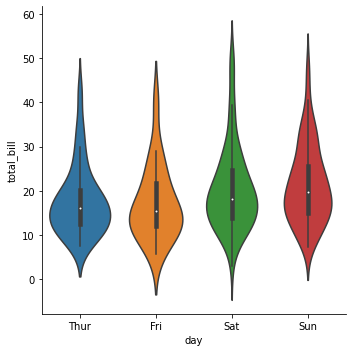

In [54]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

## MATRIX PLOT

In [56]:
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Heatmap: showing matrix, data should be in matrix 

In [61]:
tc = tips.corr()

<AxesSubplot:>

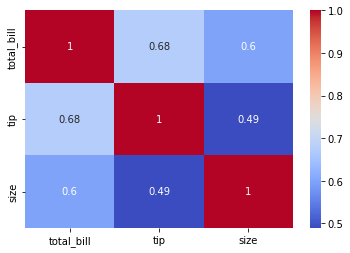

In [64]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [69]:
fp = flights.pivot_table(index="month", columns= 'year',values='passengers' )

<AxesSubplot:xlabel='year', ylabel='month'>

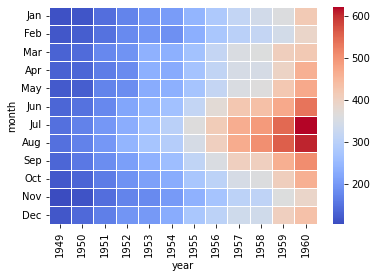

In [73]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=1)

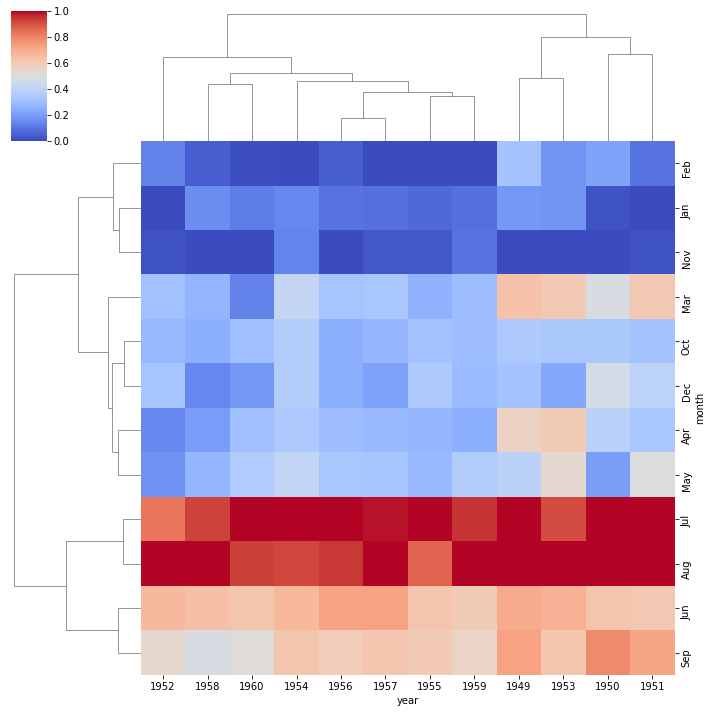

In [76]:
sns.clustermap(fp,cmap='coolwarm', standard_scale=1)

## GRIDS

In [77]:
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')

In [78]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

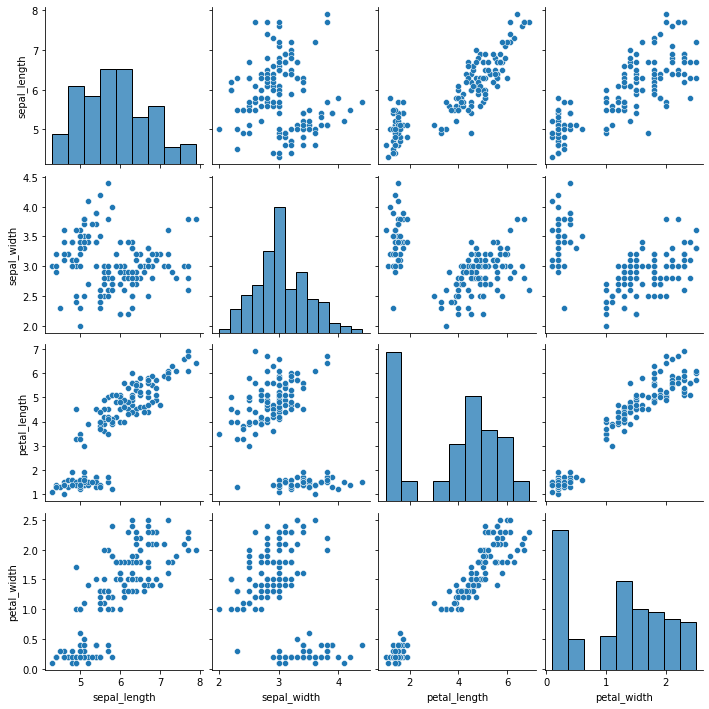

In [82]:
sns.pairplot(iris)

C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings

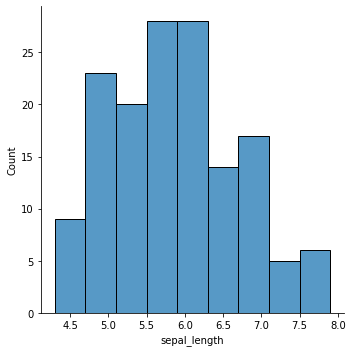

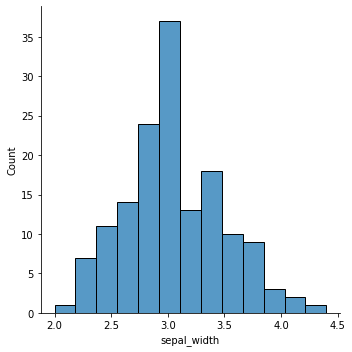

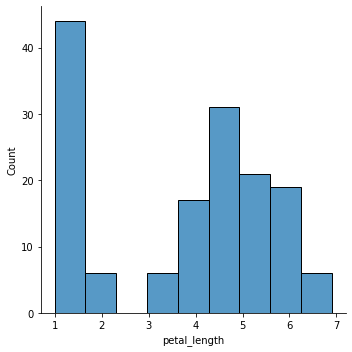

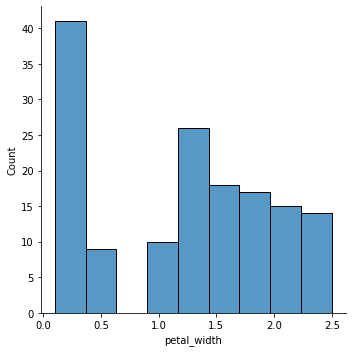

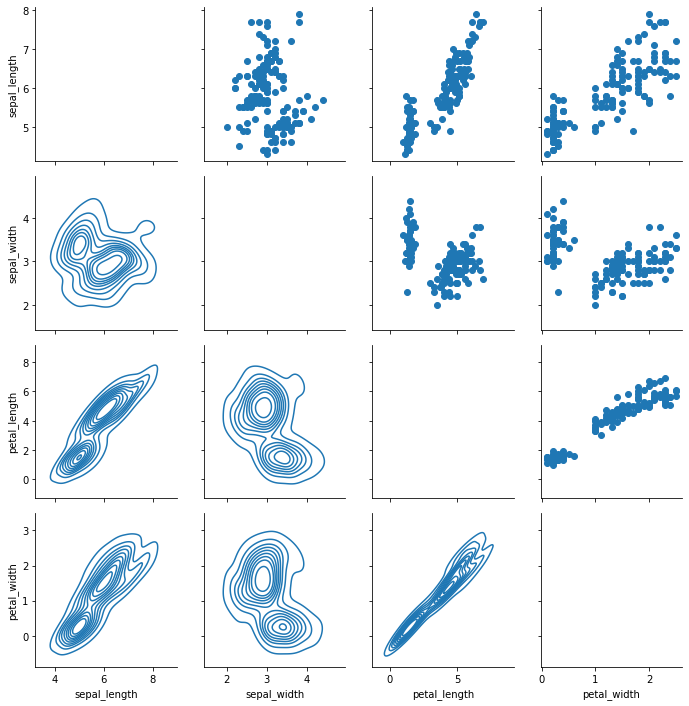

In [88]:
g = sns.PairGrid(iris)

#g.map(plt.scatter)

g.map_diag(sns.displot);
g.map_upper(plt.scatter);
g.map_lower(sns.kdeplot);

In [89]:
tips =sns.load_dataset('tips')

In [90]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


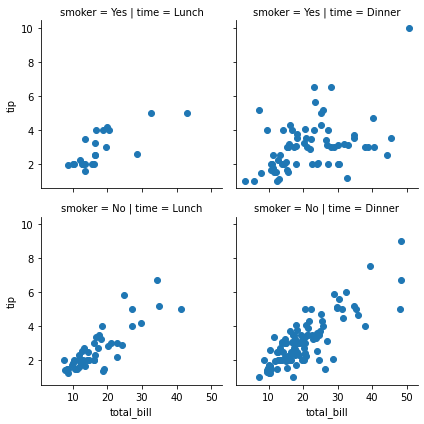

In [94]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')

#g.map(sns.distplot,'total_bill')
g.map(plt.scatter, 'total_bill','tip')

## Regression Plots

In [96]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


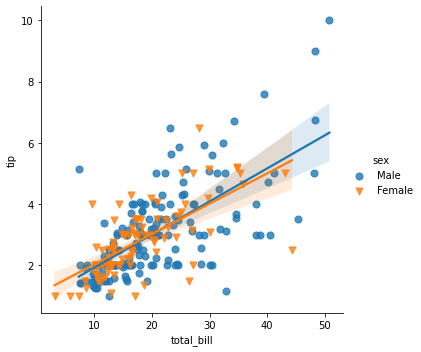

In [102]:
sns.lmplot(x='total_bill',y='tip', data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':50})

C:\Users\chgra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


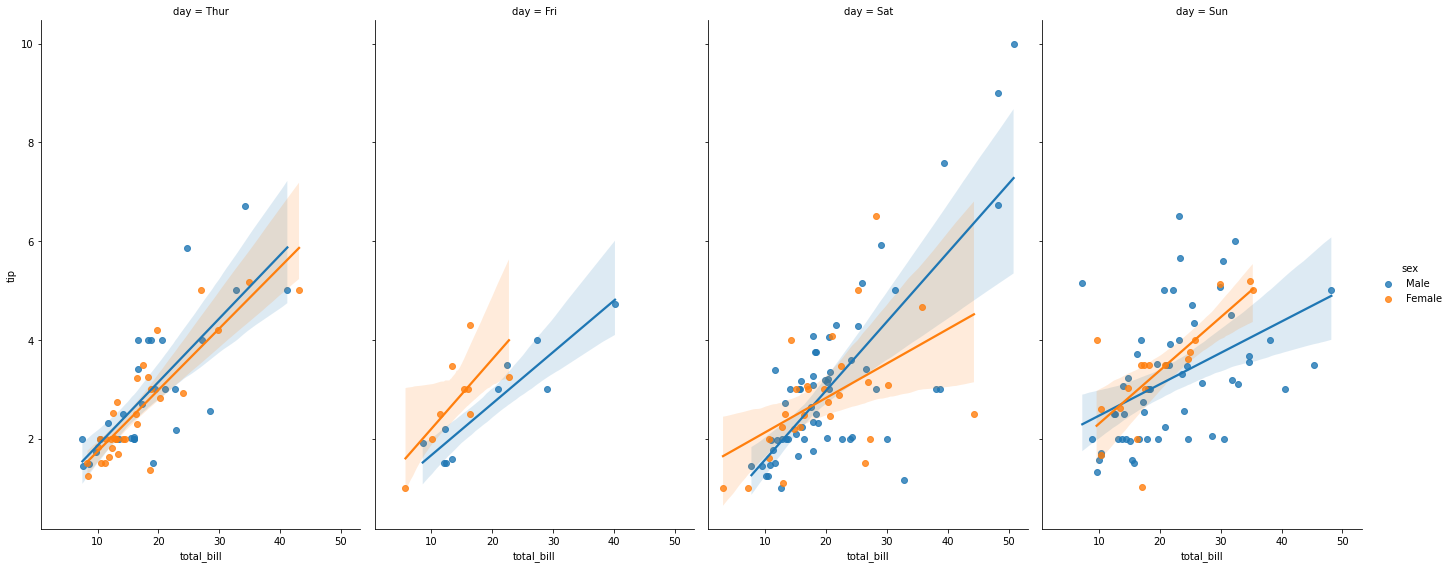

In [109]:
sns.lmplot(x='total_bill',y='tip', data=tips,col='day',hue='sex',
          aspect=0.6,size=8)

## Style and Color

In [110]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')

In [111]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


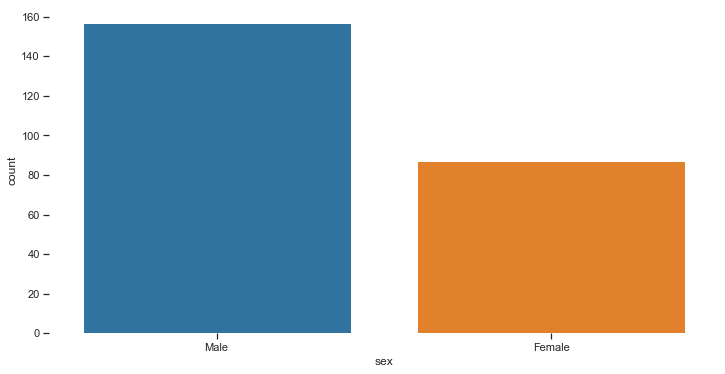

In [124]:
#sns.set_style('ticks')

plt.figure(figsize=(12,6))

sns.set_context('notebook')

sns.countplot(x='sex', data=tips)

sns.despine(left=True, bottom=True)

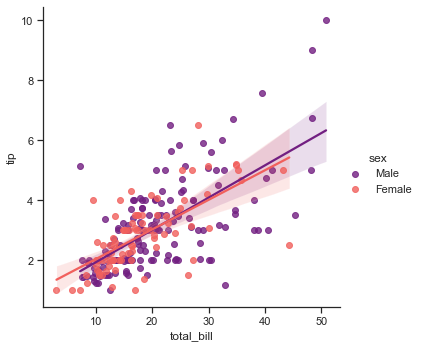

In [127]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='magma')